Copyright (C) Microsoft Corporation.

# Download Data 

In this notebook, we download the data and provide some insights on the bounding boxes. 

In [1]:
%matplotlib inline

import sys
import os
import glob
from lxml import etree
import matplotlib.pyplot as plt
from utilities import create_dir

sys.path.append("../models/research/") # Modify to point to your tensorflow models directory
from object_detection.utils import dataset_util
from object_detection.utils import label_map_util
from object_detection.dataset_tools import tf_record_creation_util

import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
create_dir('annotated')

exists


The below step requires that yo have [AzCopy](https://docs.microsoft.com/en-us/azure/storage/common/storage-use-azcopy-linux?toc=%2fazure%2fstorage%2fblobs%2ftoc.json#download-and-install-azcopy) installed. 

In [ ]:
azcopy --source /datadrive/OutOfStockDemo/annotated_val/ --destination https://hyperdrivedlhappypath.blob.core.windows.net/annotatedval --dest-key 4cUirlDxcaqOSOGQdjA3jfce5seskHDC61xvYGO1bOTO6upsPYpleX5kbmDnoXJNZm+pBkkyzv4Ar/Nw4e+XXQ== --recursive

In [3]:
!azcopy --source https://olympusvideoblob.blob.core.windows.net/grocerydemolabeled/Converted\ \ Jpg\ with\ xml/ --destination ./annotated --source-key rn0do+y1iUoMuAx1l7EYTZDxktgV961RHKaSz34uOIom8fUEQMXM0kDEUf4RlKY0qc/lsn0oNtTDFT/Rvu4deA== --recursive

=Finished: 0 file(s), 0 B; Average Speed:0 B/s.                                 Finished: 0 file(s), 0 B; Average Speed:0 B/s.                                 Finished: 0 file(s), 0 B; Average Speed:0 B/s.                                 Finished: 0 file(s), 0 B; Average Speed:0 B/s.                                 Finished: 0 file(s), 591 B; Average Speed:60.92 B/s.                           Finished: 1558 file(s), 46.306 MB; Average Speed:3.95 MB/s.                    Finished: 1559 file(s), 46.306 MB; Average Speed:3.36 MB/s.                    Finished: 1560 file(s), 46.306 MB; Average Speed:2.93 MB/s.                                                                                                   Finished 1560 of total 1560 file(s).
                                                                               [2019/04/30 13:10:52] Transfer summary:
-----------------
Total files transferred: 1560
Transfer successfully:   1560
Transfer skipped:        0
Transfer failed:         0

In [12]:
# !azcopy --source https://olympusvideoblob.blob.core.windows.net/grocerydemolabeled/Converted\ \Jpg\ with\ xml\ small\ bounding\ boxes/ --destination ./annotated --source-key rn0do+y1iUoMuAx1l7EYTZDxktgV961RHKaSz34uOIom8fUEQMXM0kDEUf4RlKY0qc/lsn0oNtTDFT/Rvu4deA== --recursive

Here, we define the Label Map required by Tensorflow OD API. Details can be found [here.](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/using_your_own_dataset.md)

In [3]:
%%writefile stockout_label_map.pbtxt

item {
  id: 1
  name: 'stockout'
}

Overwriting stockout_label_map.pbtxt


In [4]:
# Annotated Images directory
data_dir = './annotated/'
# Label map path
label_map_path = './stockout_label_map.pbtxt'

In [5]:
# Read label dictionary
label_map_dict = label_map_util.get_label_map_dict(label_map_path)

In [13]:
# in_images = glob.glob(data_dir + '*.jpg')
# print("There are {} images.".format(len(in_images)))

In [6]:
in_images = glob.glob(data_dir + '/**/'+ '*.jpg')
print("There are {} images.".format(len(in_images)))

There are 538 images.


In [7]:
in_images_sub = glob.glob(data_dir + '/**/**/'+ '*.jpg')
print("There are {} images.".format(len(in_images_sub)))

There are 239 images.


In [8]:
in_images = in_images + in_images_sub
print("There are {} images.".format(len(in_images)))

There are 777 images.


Here, we define a function to analyze bounding box width and heights.

In [9]:
def plot_bb(examples, normalized=False):
    heights = []
    widths = []
    for idx, example in enumerate(examples):
        if idx % 1 == 0:
#             print('On image {} of {}'.format(idx, len(examples)))
#             xml_path = os.path.join(annot_dir, example[:-4] + '.xml')
            xml_path = os.path.join(example[:-4] + '.xml')
            if not os.path.exists(xml_path):
                print('Could not find {}, ignoring example'.format(xml_path))
                continue
            with tf.gfile.GFile(xml_path, 'r') as fid:
                xml_str = fid.read()
            xml = etree.fromstring(xml_str)
            data = dataset_util.recursive_parse_xml_to_dict(xml)['annotation']
            width = int(data['size']['width'])
            height = int(data['size']['height'])        
            if 'object' in data:
                for obj in data['object']:
                    xmin = float(obj['bndbox']['xmin'])
                    xmax = float(obj['bndbox']['xmax'])
                    ymin = float(obj['bndbox']['ymin'])
                    ymax = float(obj['bndbox']['ymax'])
#                     print((xmax -xmin), (ymax - ymin))
                    if normalized:
                        widths.append((xmax -xmin) / width)
                        heights.append((ymax - ymin)  / height)
                    else:
                        widths.append((xmax -xmin) )
                        heights.append((ymax - ymin))
    plt.scatter(widths, heights)
    plt.xlabel("bb width")
    plt.ylabel("bb height")

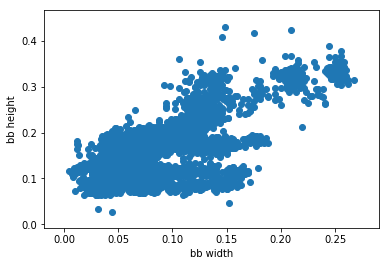

In [10]:
plot_bb(in_images, normalized=True)

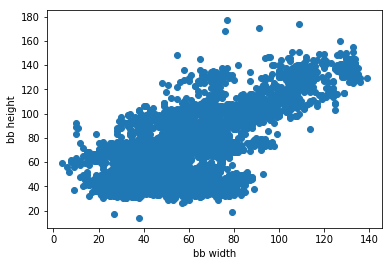

In [11]:
plot_bb(in_images)

You can now proceed to the next notebook to preprocess images and annotations for Tensorflow OD API.